In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import backtest
import utils

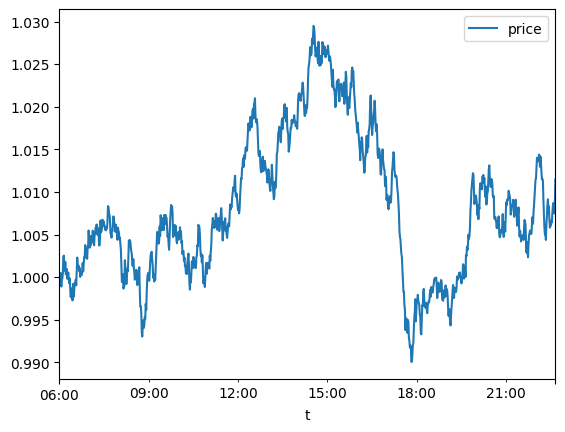

,t,signal
0,2025-01-01 06:00:00,0
1,2025-01-01 06:01:00,-1
2,2025-01-01 06:02:00,-1
3,2025-01-01 06:03:00,0
4,2025-01-01 06:04:00,-1


In [2]:
n = 1000
base_price = 1
rng = np.random.default_rng(seed=33)

price_df = utils.generate_random_prices(rng, n, base_price)
signal_df = utils.generate_random_signal(rng, n, side_probs=0.1)

price_df.plot(x='t', y='price')
plt.show()

signal_df.head()

### Extreme spread case

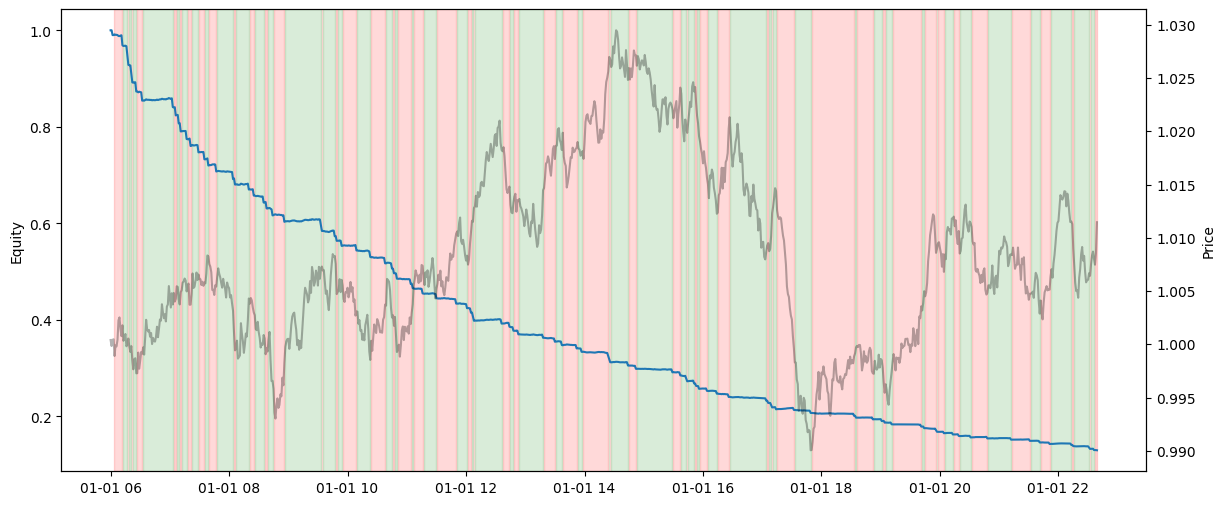

In [3]:
return_df, trade_df = backtest.backtester(price_df, signal_df, spread=0.02)
utils.draw_results(return_df, price_df)
plt.show()

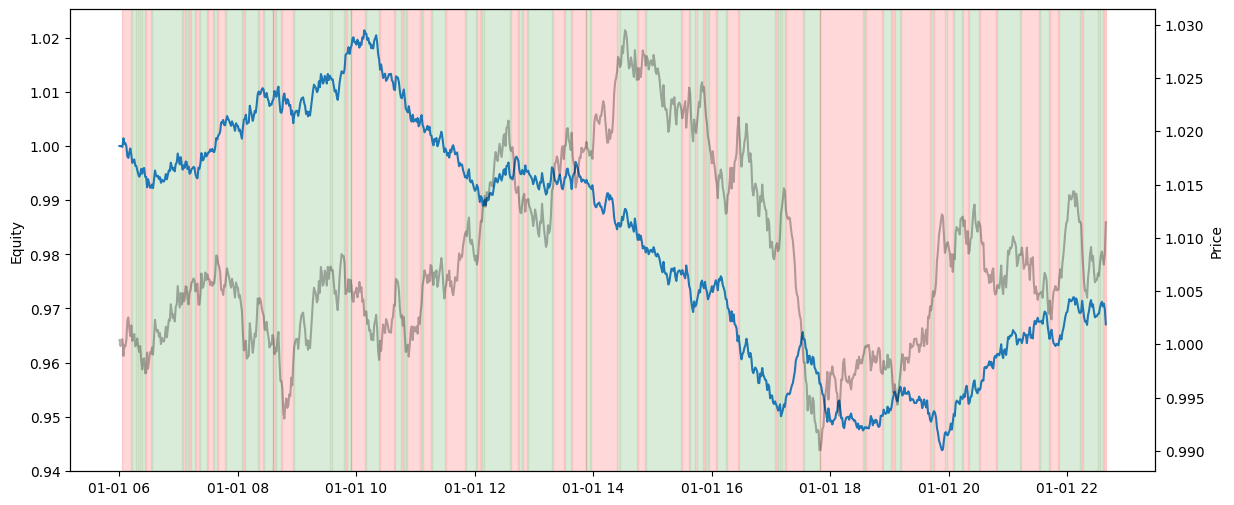

In [4]:
return_df, trade_df = backtest.backtester(price_df, signal_df, spread=0.0002)
utils.draw_results(return_df, price_df)
plt.show()

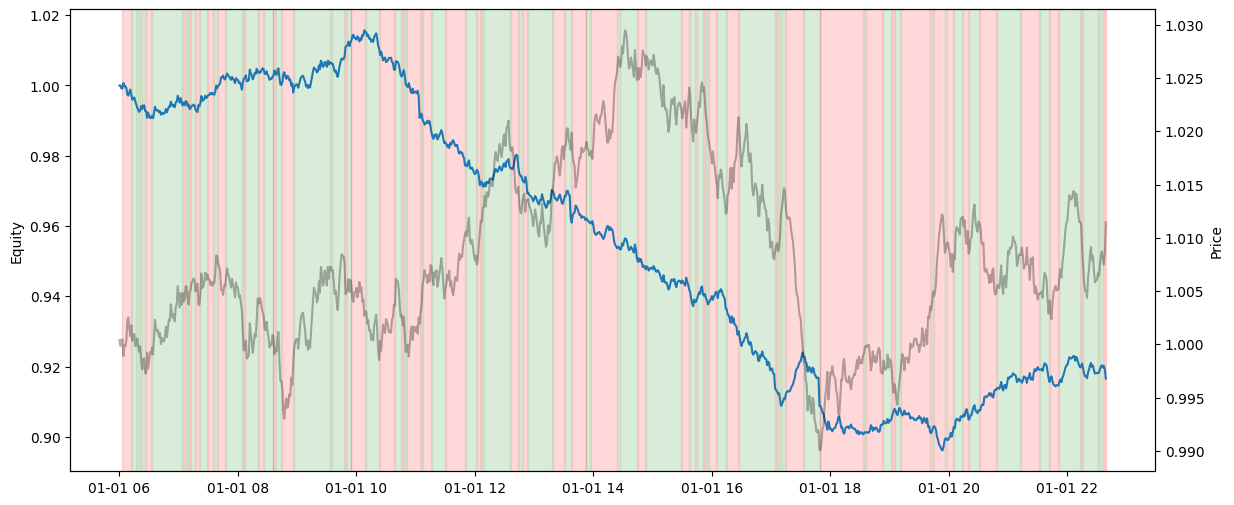

In [5]:
spread_df = utils.generate_random_spreads(rng, n)
# spread_df = pd.DataFrame({'t': times, 'quoted_spread': 0.0002 * np.exp(norm_gen.normal(loc=0, scale=2, size=n))})
return_df, trade_df = backtest.backtester(price_df, signal_df, spread=spread_df)
utils.draw_results(return_df, price_df)
plt.show()

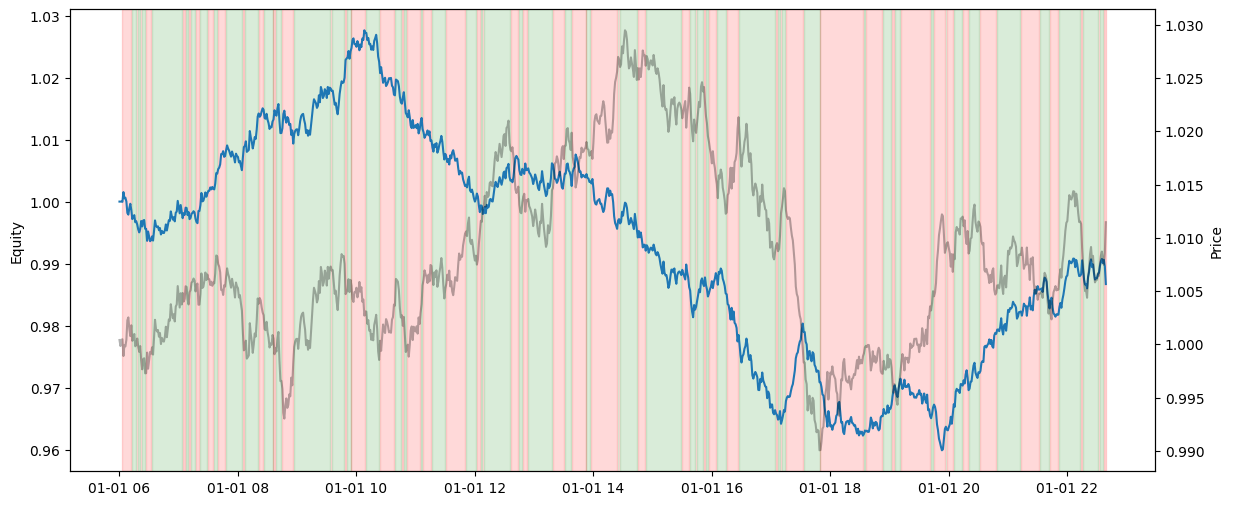

In [6]:
return_df, trade_df = backtest.backtester(price_df, signal_df, spread=0)
utils.draw_results(return_df, price_df)
plt.show()

## Absolute spread example

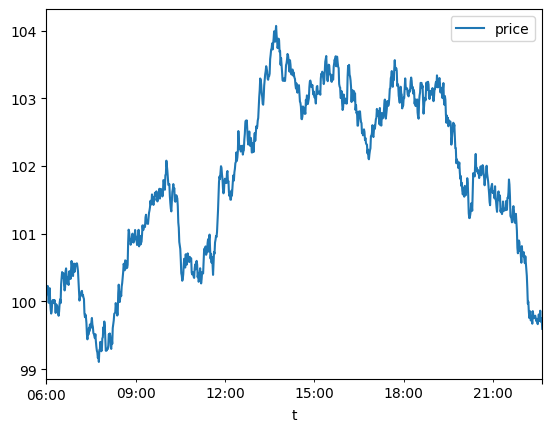

,t,signal
0,2025-01-01 06:00:00,0
1,2025-01-01 06:01:00,0
2,2025-01-01 06:02:00,0
3,2025-01-01 06:03:00,0
4,2025-01-01 06:04:00,0


In [7]:
# TODO: move to separate module
n = 1000
base_price = 100
rng = np.random.default_rng(seed=32)

price_df = utils.generate_random_prices(rng, n, base_price)
signal_df = utils.generate_random_signal(rng, n, side_probs=0.1)

price_df.plot(x='t', y='price')
plt.show()

signal_df.head()

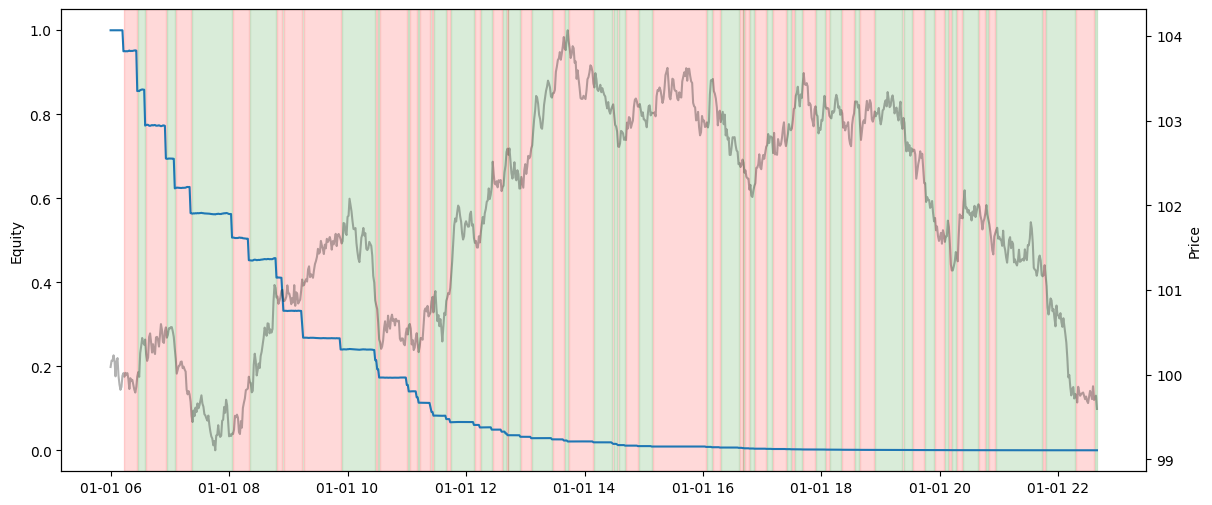

In [8]:
# Forget to put off relative spread flag
return_df, trade_df = backtest.backtester(price_df, signal_df, spread=0.1)
fig, ax, ax2 = utils.draw_results(return_df, price_df)
plt.show()

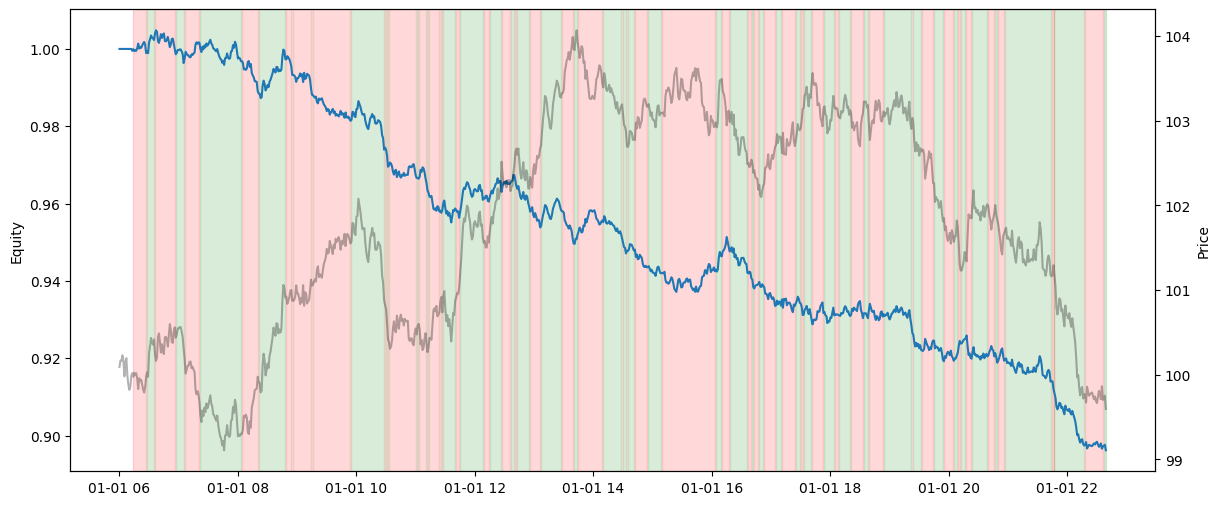

In [9]:
# Relative spread
return_df, trade_df = backtest.backtester(price_df, signal_df, spread=0.1, spread_is_relative=False)
fig, ax, ax2 = utils.draw_results(return_df, price_df)
plt.show()

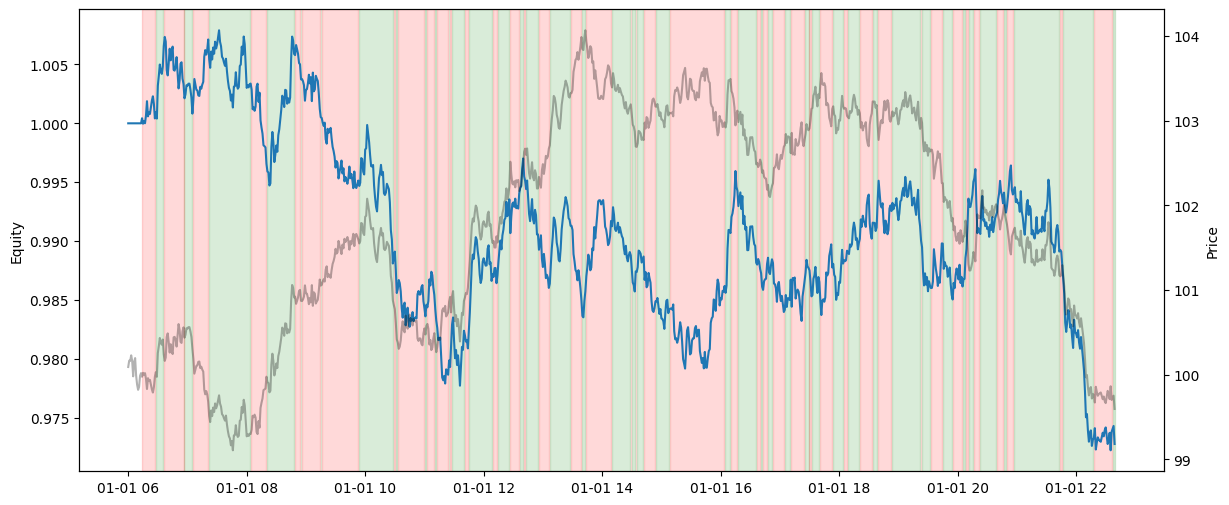

In [10]:
# No spread at all for reference
return_df, trade_df = backtest.backtester(price_df, signal_df, spread=0)
fig, ax, ax2 = utils.draw_results(return_df, price_df)
plt.show()